In [112]:
from PIL import Image
import gudhi as g
import numpy as np

### Task 1

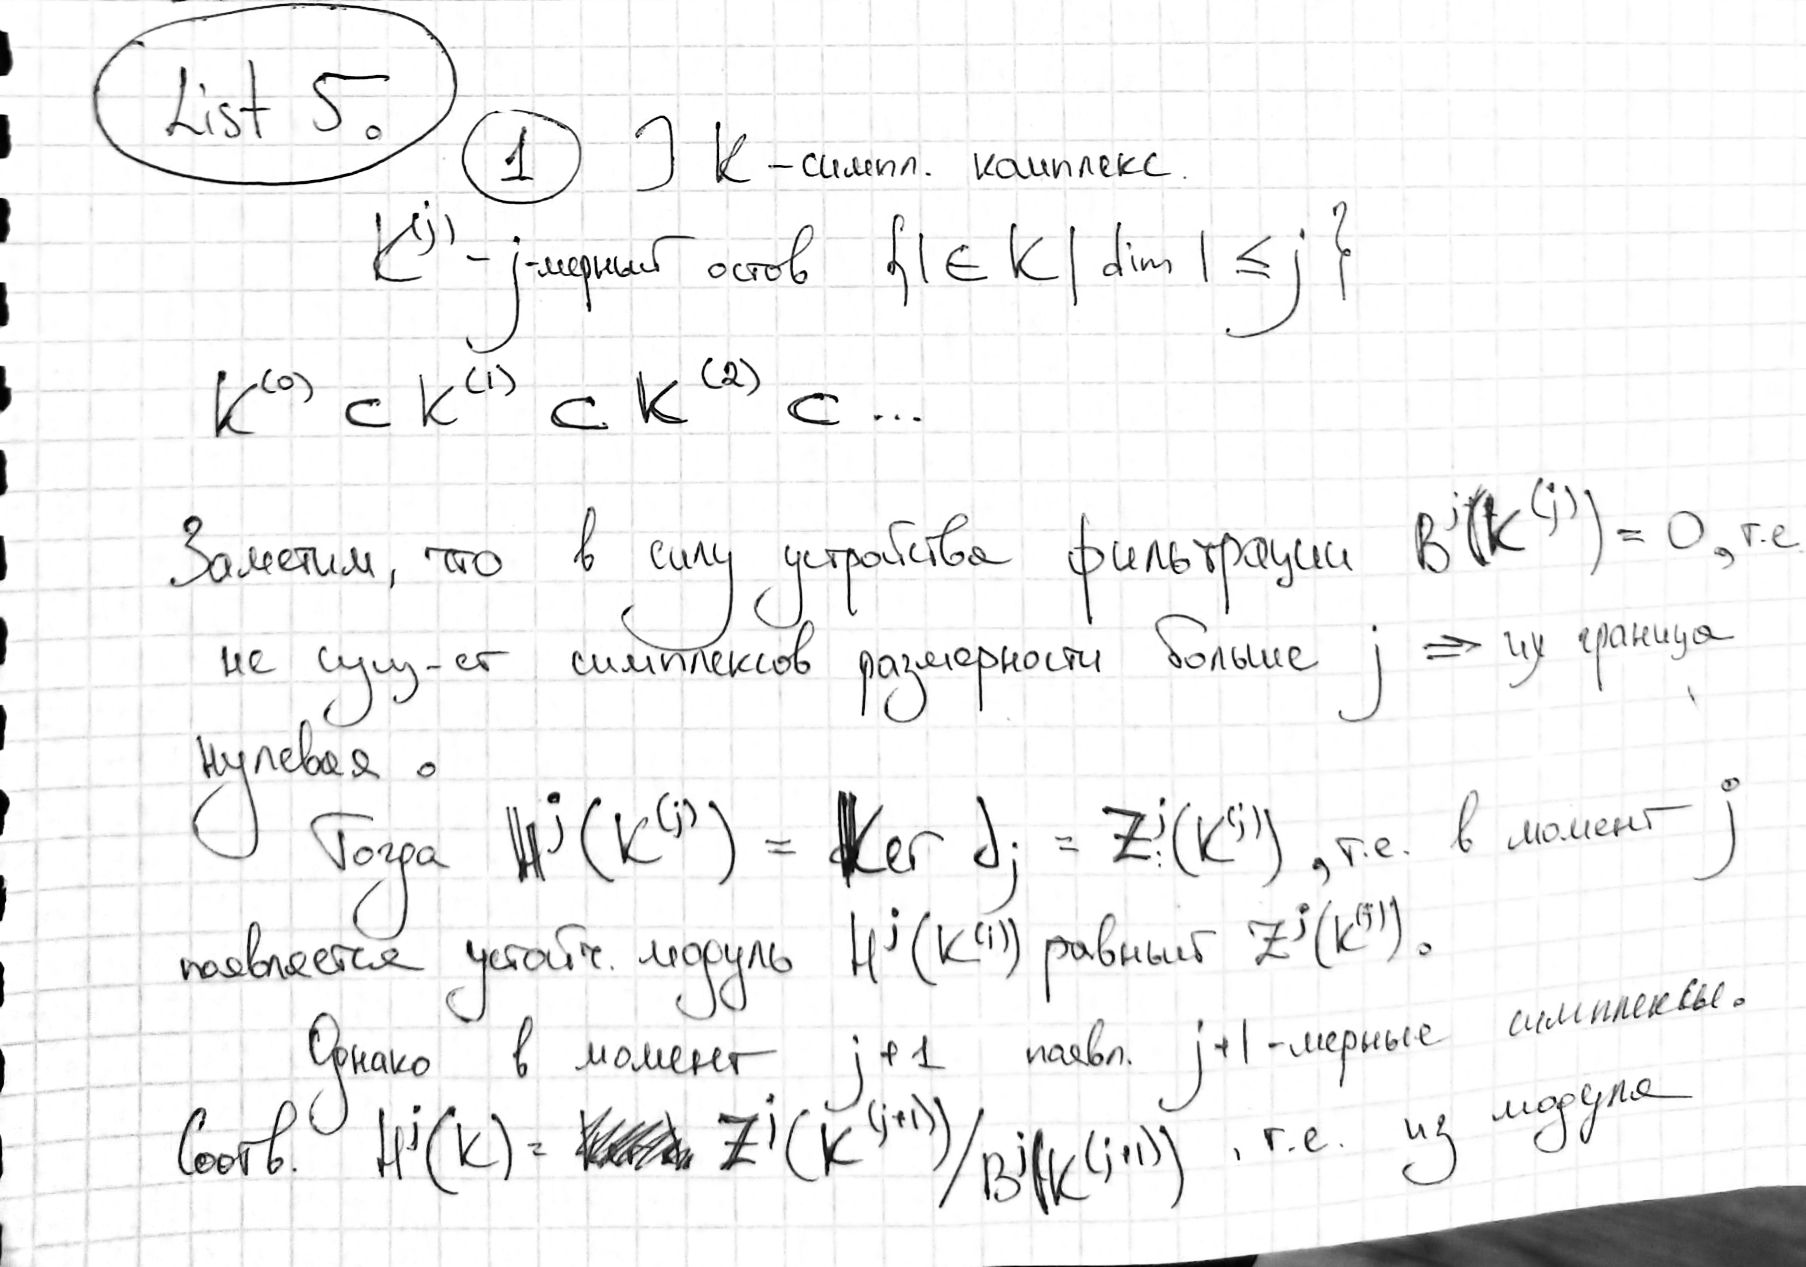

In [2]:
Image.open("1.jpg")

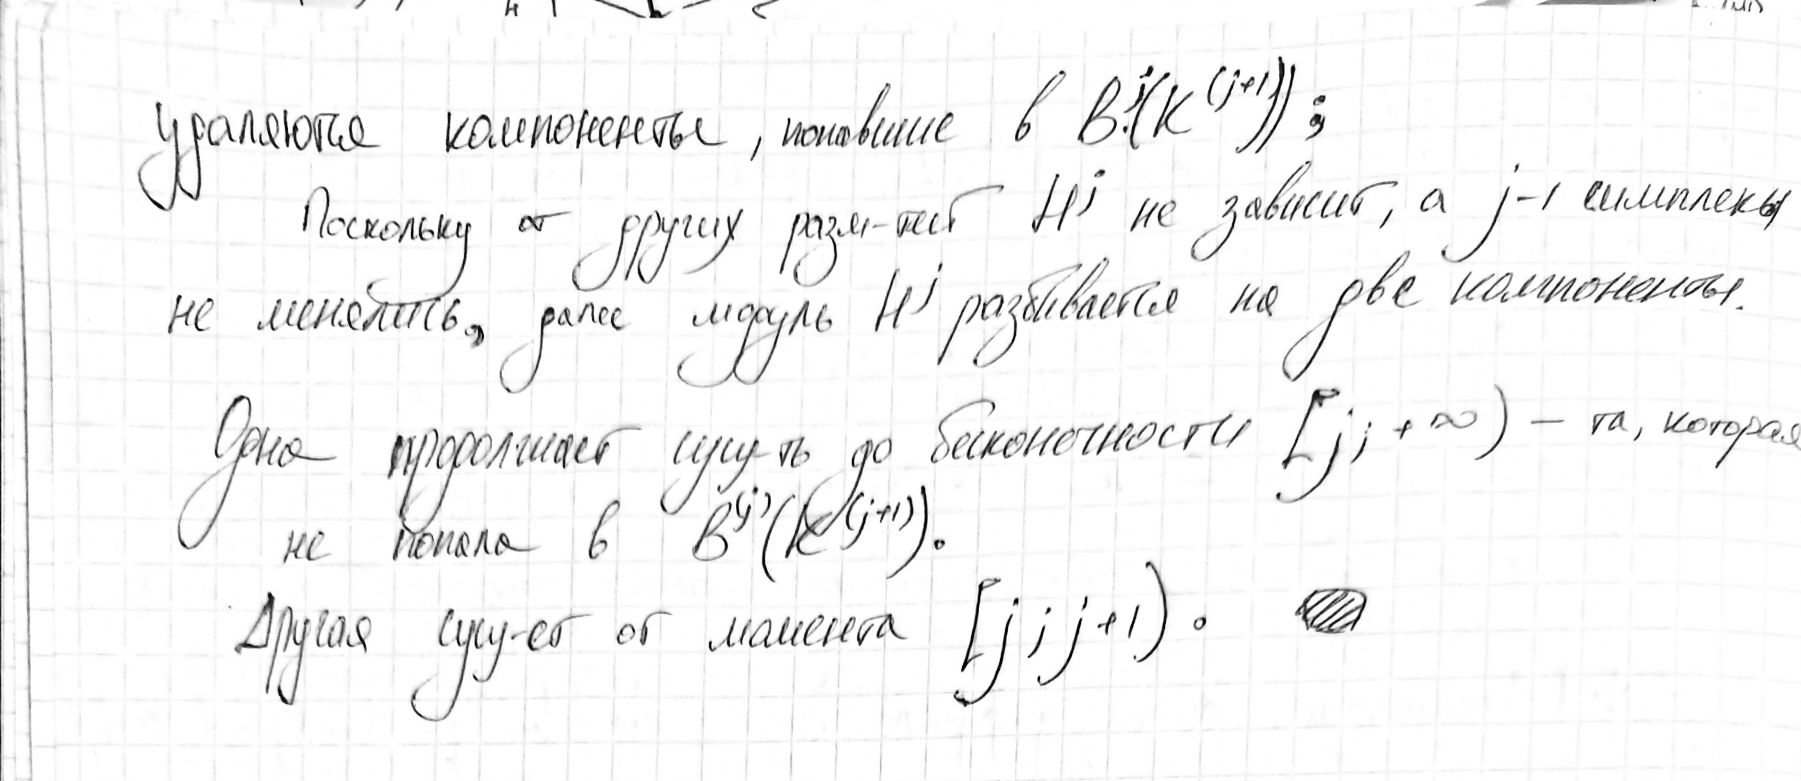

In [3]:
Image.open("2.jpg")

### Task 2

In [93]:
def ColScale(A,k,scale):
    '''
    k -- column to scale
    scale -- scaling factor
    '''

    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A
    
    B = np.copy(A).astype('float64')

    for k in range(m):
        B[k][j] *= scale
        
    return B

def ColAdd(A,k,l,scale):
    '''
    k -- column to add
    l -- column to add to
    '''

    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A
    
    B = np.copy(A).astype('float64')
        
    for j in range(m):
        B[j][l] += B[j][k]*scale
        
    return B

In [94]:
filtration = [
    ([1], 0),
    ([2], 0),
    ([3], 0),
    ([1, 2], 4),
    ([2, 3], 4),
    ([4], 4),
    ([1, 4], 5),
    ([3, 4], 5),
    ([1, 3], 7),
    ([2, 4], 10),
    ([1, 2, 3], 16),
    ([1, 2, 4], 16),
    ([1, 3, 4], 16),
    ([2, 3, 4], 20),
    ([1, 2, 3, 4], 23)
]

In [95]:
simplices, times = zip(*filtration)

In [179]:
simplices

([1],
 [2],
 [3],
 [1, 2],
 [2, 3],
 [4],
 [1, 4],
 [3, 4],
 [1, 3],
 [2, 4],
 [1, 2, 3],
 [1, 2, 4],
 [1, 3, 4],
 [2, 3, 4],
 [1, 2, 3, 4])

In [239]:
matrix = np.matrix(np.zeros((len(simplices), len(simplices))), dtype=np.byte)

In [240]:
matrix

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8)

In [241]:
for i in range(len(simplices)):
    for j in range(i, len(simplices)):
        x = set(simplices[i])
        y = set(simplices[j])
        if len(y) == len(x) + 1 and x.issubset(y):
            matrix[i, j] = 1

In [242]:
matrix

matrix([[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8)

In [246]:
for i in range(matrix.shape[0]):
    nonzero_col = np.flatnonzero(matrix[:, i])
    while len(nonzero_col) != 0:
        flag = False
        for j in range(i):
            if matrix[nonzero_col[-1], j] == matrix[nonzero_col[-1], i]: 
                matrix[:, i] = np.abs(matrix[:, i] - matrix[:, j])
                nonzero_col = np.flatnonzero(matrix[:, i])
                break
            elif j == i-1:
                flag = True
        if flag:
            break

In [247]:
matrix

matrix([[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8)

### Homologies

In [258]:
print(simplices[0], "inf")
for i in range(matrix.shape[1]):
    death = np.flatnonzero(matrix[:, i])
    if len(death) == 0:
        continue
    else:
        print(simplices[death[-1]], simplices[i], times[death[-1]], times[i])

[1] inf
[2] [1, 2] 0 4
[3] [2, 3] 0 4
[4] [1, 4] 4 5
[1, 3] [1, 2, 3] 7 16
[2, 4] [1, 2, 4] 10 16
[3, 4] [1, 3, 4] 5 16
[2, 3, 4] [1, 2, 3, 4] 20 23


### Simplices birth and death

In [254]:
for i in range(matrix.shape[0]):
    death = np.flatnonzero(matrix[i, :])
    if len(death) == 0:
        print(simplices[i], "inf")
    else:
        print(simplices[i], simplices[death[0]], times[i], times[death[0]])

[1] [1, 2] 0 4
[2] [1, 2] 0 4
[3] [2, 3] 0 4
[1, 2] [1, 2, 3] 4 16
[2, 3] [1, 2, 3] 4 16
[4] [1, 4] 4 5
[1, 4] [1, 2, 4] 5 16
[3, 4] [1, 3, 4] 5 16
[1, 3] [1, 2, 3] 7 16
[2, 4] [1, 2, 4] 10 16
[1, 2, 3] [1, 2, 3, 4] 16 23
[1, 2, 4] [1, 2, 3, 4] 16 23
[1, 3, 4] [1, 2, 3, 4] 16 23
[2, 3, 4] [1, 2, 3, 4] 20 23
[1, 2, 3, 4] inf


### Task 3

### Task 4

In [51]:
tree = g.SimplexTree()

In [52]:
simplices = [
    ([1], 0), 
    ([2], 0), 
    ([3], 0),
    ([1, 2], 2), 
    ([4], 2.5),
    ([5], 3), 
    ([2, 3], 3), 
    ([3, 4], 3.7),
    ([1, 4], 4),
    ([1, 5], 4.3),
    ([4, 5], 5),
    ([3, 5], 7.9),
    ([6], 8),
    ([1, 6], 9),
    ([2, 6], 9.3), 
    ([3, 6], 9), 
    ([2, 5], 10.2),
    ([4, 6], 12)
]

In [54]:
for simplex in simplices:
    simplex, filt_val = simplex
    tree.insert(simplex, filt_val)

In [91]:
tree.compute_persistence()

In [84]:
persist_tree = tree.persistence(persistence_dim_max=True)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

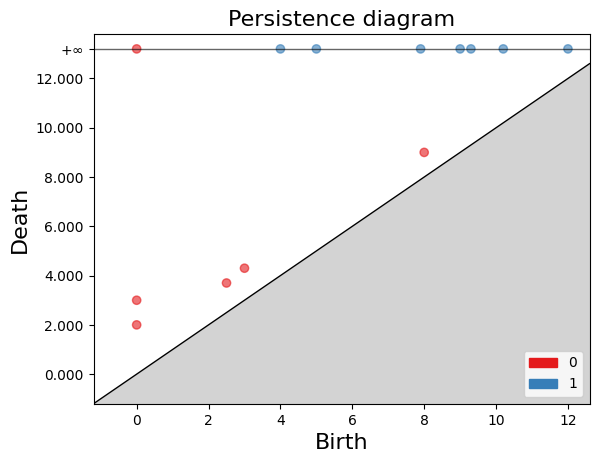

In [85]:
g.persistence_graphical_tools.plot_persistence_diagram(persist_tree)